In [1]:
###9.2.16

# NKI resting state data from nilearn
from nilearn import datasets

nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)

# The nki dictionary contains file names for the data
# of all downloaded subjects.
print(('Resting state data of the first subjects on the '
       'fsaverag5 surface left hemisphere is at: %s' %
      nki_dataset['func_left'][0]))

# Destrieux parcellation for left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_left']
labels = destrieux_atlas['labels']

# Fsaverage5 surface template
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to
# the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])


Dataset created in /home/pierre/nilearn_data/nki_enhanced_surface



 ...done. (0 seconds, 0 min)


Downloaded 27164672 of 42412120 bytes (64.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 32210944 of 42402060 bytes (76.0%,    1.0s remaining)

Resting state data of the first subjects on the fsaverag5 surface left hemisphere is at: /home/pierre/nilearn_data/nki_enhanced_surface/A00028185/A00028185_left_preprocessed_fwhm6.gii
Fsaverage5 pial surface of left hemisphere is at: /home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz


 ...done. (4 seconds, 0 min)


In [2]:
# Load resting state time series from nilearn
from nilearn import surface

timeseries = surface.load_surf_data(nki_dataset['func_left'][0])

# Extract seed region via label
pcc_region = b'G_cingul-Post-dorsal'

import numpy as np
pcc_labels = np.where(parcellation == labels.index(pcc_region))[0]

# Extract time series from seed region
seed_timeseries = np.mean(timeseries[pcc_labels], axis=0)

In [3]:
# Calculate Pearson product-moment correlation coefficient between seed
# time series and timeseries of all cortical nodes of the hemisphere
from scipy import stats

stat_map = np.zeros(timeseries.shape[0])
for i in range(timeseries.shape[0]):
    stat_map[i] = stats.pearsonr(seed_timeseries, timeseries[i])[0]

# Re-mask previously masked nodes (medial wall)
stat_map[np.where(np.mean(timeseries, axis=1) == 0)] = 0

/home/pierre/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


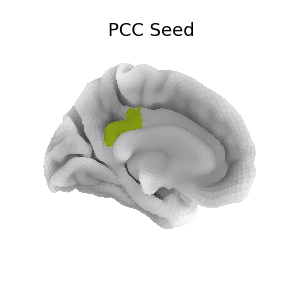

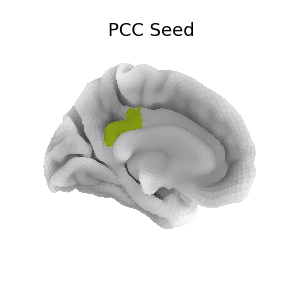

In [4]:
# Transform ROI indices in ROI map
pcc_map = np.zeros(parcellation.shape[0], dtype=int)
pcc_map[pcc_labels] = 1

from nilearn import plotting

plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=pcc_map,
                       hemi='left', view='medial',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       title='PCC Seed')

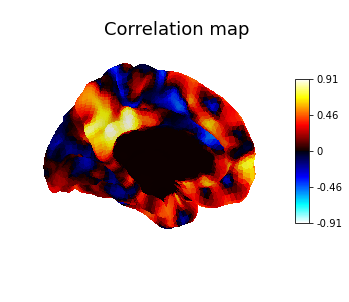

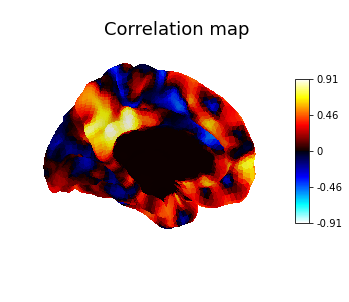

In [5]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial', colorbar=True,
                            bg_map=fsaverage['sulc_left'], bg_on_data=True,
                            darkness=.3, title='Correlation map')

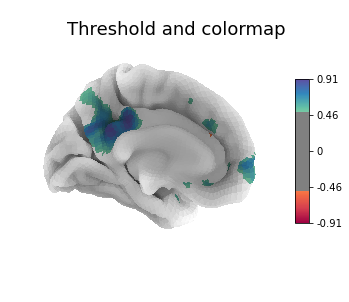

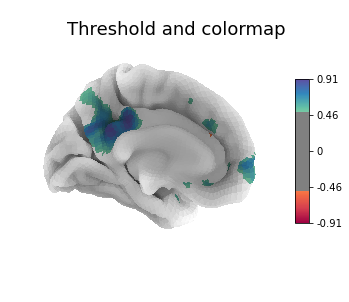

In [6]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial', colorbar=True,
                            bg_map=fsaverage['sulc_left'], bg_on_data=True,
                            cmap='Spectral', threshold=.5,
                            title='Threshold and colormap')

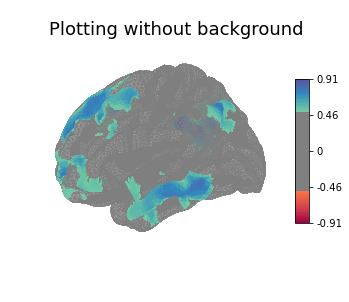

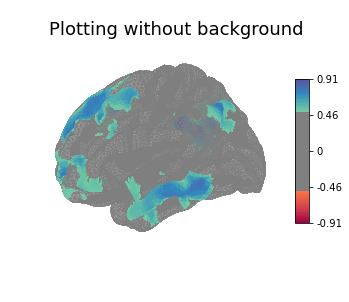

In [7]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='lateral', colorbar=True,
                            cmap='Spectral', threshold=.5,
                            title='Plotting without background')

In [8]:
plotting.plot_surf_stat_map(fsaverage['infl_left'], stat_map=stat_map,
                            hemi='left', bg_map=fsaverage['sulc_left'],
                            bg_on_data=True, threshold=.5, colorbar=True,
                            output_file='plot_surf_stat_map.png')

plotting.show()